## Feature engineering

In [1]:
# importing libraries
import datetime as dt

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
from pandas.plotting import scatter_matrix

In [2]:
churn_eng = pd.read_csv("../data/df_from_eda.csv")

In [3]:
churn_eng.head(3)

,player_id,date,gender,vertical,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum
0,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-21,female,NaN,31,0,0,0,0,0,0,2233
1,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-22,female,NaN,0,0,0,0,0,0,0,1957
2,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-29,female,casino_classic,0,0,73,43,-30,30,0,2313


### Convert `date`column to datetime format

In [4]:
# convert object column to datetime format
churn_eng["date"] = pd.to_datetime(churn_eng["date"])

### Create 4 new columns from `date`:
* `day_of_the_week`
* `day_of_the_month`
* `month`
* `week_of_year`

In [5]:
# create new features from date
churn_eng["day_of_week"] = churn_eng["date"].dt.weekday  # day of the week (0 = Monday)
churn_eng["day_of_month"] = churn_eng["date"].dt.day  # day of the month
churn_eng["month"] = churn_eng["date"].dt.month  # month
churn_eng["week_of_year"] = churn_eng["date"].dt.isocalendar().week  # week of the year

In [6]:
churn_eng.head(3)

,player_id,date,gender,vertical,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum,day_of_week,day_of_month,month,week_of_year
0,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-21,female,NaN,31,0,0,0,0,0,0,2233,0,21,1,4
1,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-22,female,NaN,0,0,0,0,0,0,0,1957,1,22,1,4
2,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-29,female,casino_classic,0,0,73,43,-30,30,0,2313,1,29,1,5


The feature `player_id` format is not useful neither practical. So it will be modified.

In [7]:
# convert player_id to category to label enconder it
churn_eng["player_id"] = churn_eng["player_id"].astype("category")
churn_eng["player_id_cat"] = churn_eng["player_id"].cat.codes
churn_eng["player_id_cat"] = churn_eng["player_id_cat"] + 1

### Removing features

We can remove `player_id` now.

In [8]:
# removing features
#churn_eng = churn_eng.drop(["player_id", "date"], axis=1)
churn_eng = churn_eng.drop(["player_id"], axis=1)

Since the missing values are less than 1% for `gender` and about 3% for `vertical` they will be removed.

In [9]:
# remove row with missing value for gender and vertical
churn_eng.dropna(axis=0, subset=["gender"], inplace=True)
churn_eng.dropna(axis=0, subset=["vertical"], inplace=True)

In [10]:
# total number of missing values, if they are present
print("Features with missing values:\n")
churn_eng.isnull().sum()[churn_eng.isnull().sum() > 0]

Features with missing values:



Series([], dtype: int64)

No more missing values.

In [11]:
# showing new dimensions of the dataset
print("Dimensions of the dataset:")
print(f" Number of rows: {churn_eng.shape[0]}")
print(f" Number of columns: {churn_eng.shape[1]}")
print()

Dimensions of the dataset:
 Number of rows: 112851
 Number of columns: 16



### Reordering columns

For the sake of clarity the order of columns in the dataframe will be changed.

In [12]:
# actual order of columns
list(churn_eng.columns)

['date',
 'gender',
 'vertical',
 'deposit_approved_sum',
 'withdrawal_approved_sum',
 'turnover_cash_sum',
 'winning_cash_sum',
 'result_cash_sum',
 'NGR_sum',
 'bonus_cash_sum',
 'session_sum',
 'day_of_week',
 'day_of_month',
 'month',
 'week_of_year',
 'player_id_cat']

In [13]:
# creating a list with the new order for the columns
cols_new_order = [
    "player_id_cat",
    "gender",
    "vertical",
    "date",
    "day_of_week",
    "day_of_month",
    "month",
    "week_of_year",
    "deposit_approved_sum",
    "withdrawal_approved_sum",
    "turnover_cash_sum",
    "winning_cash_sum",
    "result_cash_sum",
    "NGR_sum",
    "bonus_cash_sum",
    "session_sum",
]

In [14]:
# reordereing columns
churn_eng = churn_eng.reindex(columns=cols_new_order)

In [15]:
churn_eng.head(3)

,player_id_cat,gender,vertical,date,day_of_week,day_of_month,month,week_of_year,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum
2,1,female,casino_classic,2013-01-29,1,29,1,5,0,0,73,43,-30,30,0,2313
3,1,female,casino_classic,2013-02-07,3,7,2,6,0,0,0,0,0,0,0,6007
4,1,female,casino_classic,2013-02-18,0,18,2,8,0,0,0,0,0,0,0,3601


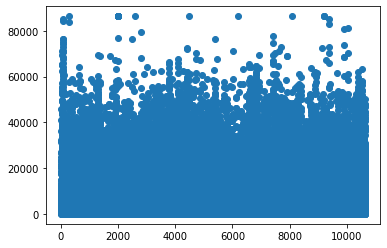

In [16]:
# 
plt.scatter(churn_eng["player_id_cat"], churn_eng["session_sum"])
plt.show()
plt.close()

In [17]:
#churn_eng_sliced = churn_eng[:1000]

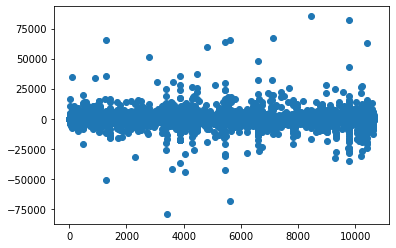

In [18]:
plt.scatter(churn_eng["player_id_cat"], churn_eng["result_cash_sum"])
plt.show()
plt.close()

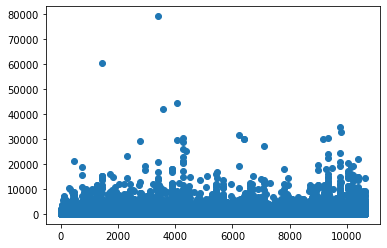

In [19]:
plt.scatter(churn_eng["player_id_cat"], churn_eng["deposit_approved_sum"])
plt.show()
plt.close()

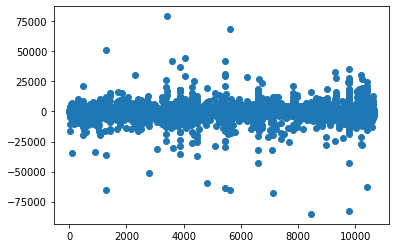

In [20]:
plt.scatter(churn_eng["player_id_cat"], churn_eng["NGR_sum"])
plt.show()
plt.close()

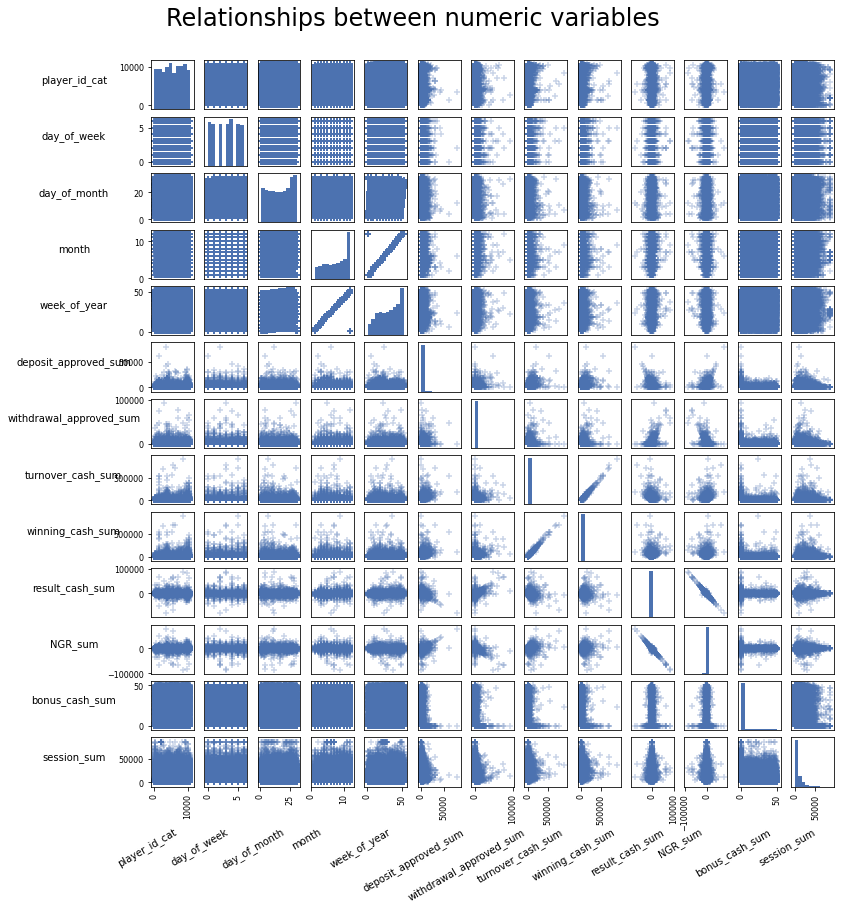

In [21]:
# visualize the dataset
plt.style.use("seaborn-deep")
sm = scatter_matrix(
    churn_eng, alpha=0.3, diagonal="hist", range_padding=0.2, marker="+", figsize=(12, 12)
)

# change label rotation
[s.xaxis.label.set_rotation(30) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# offset label when rotating to prevent overlap of figure
[s.get_xaxis().set_label_coords(-0.1, -0.8) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1.8, 0.5) for s in sm.reshape(-1)]

plt.tight_layout(h_pad=0.08, w_pad=0.08)
plt.suptitle("Relationships between numeric variables", y=1.05, size=24)
plt.show()
plt.close()

In [22]:
# save daframe to file
churn_eng.to_csv("../data/df_from_eng.csv", index=False)

### Encoding categorical features

In [23]:
churn_eng['player_id_cat'].nunique()

9027